目標: 使用 Seaborn 自帶的dataset, 利用 PANDAS 處理來繪製資料集的可是畫圖表

重點: 不同型態的類別要套用的對應圖像是不一樣的

作業: 取得另一個 dataset: titanic, 

(1) 做條形圖

(2) 利用 facet grid 繪圖並分析

(3) 繪製小提琴圖


In [9]:
conda update --all

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
# 導入必要的程式庫
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# 取得資料集
df = sns.load_dataset('titanic')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


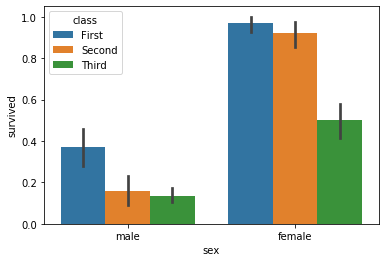

In [3]:
# 直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。

sns.barplot(x = "sex", y = "survived", data = df, hue = "class")
plt.show()

在上面的示例中,我們可以看到每個班級中男性和女性的平均存活率。從情節中,我們可以理解,女性存活人數比男性多。在男性和女性中,更多的存活率來自頭等艙。

barplot 中的特殊情況是顯示每個類別中的觀測值的"否",而不是計算第二個變數的統計資訊。




繪製數據子集的小倍數。 FacetGrid 示例,

FacetGrid 類有助於可視化一個變數的分佈,以及使用多個面板在數據集子集中分別顯示多個變數之間的關係。

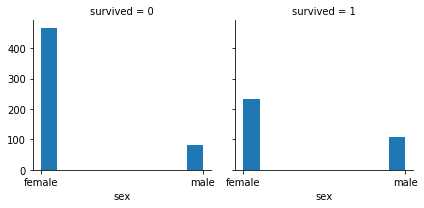

In [14]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df, col = "survived")
g.map(plt.hist,"sex")
plt.show()

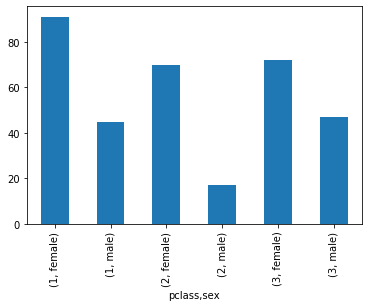

In [28]:
#先檢視各艙位存活人數，此時可以使用groupby函數進行分類，
#其中 survived＝1表示存活，survived＝0表示死亡，將survived加總即為各艙等生存人數。
df.groupby('pclass').survived.sum()

#加上性別
survived=df.groupby(['pclass','sex']).survived.sum()
survived.plot(kind='bar')
plt.show()

In [29]:
#使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
#繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

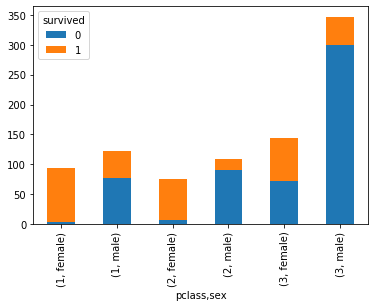

In [34]:
survived_counts.plot(kind='bar', stacked = True);

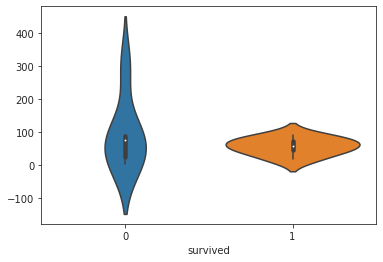

In [75]:
# 直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。

'''
在這邊coding
sns.violinplot
'''


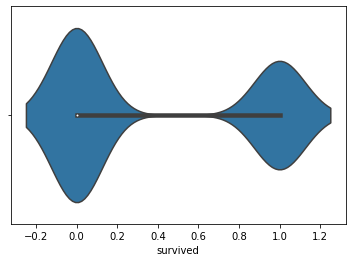

In [93]:
sns.violinplot(x = "survived", data = df);

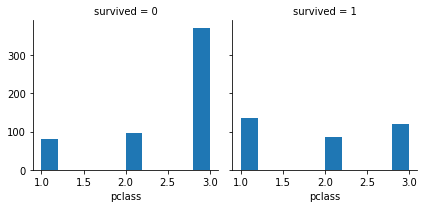

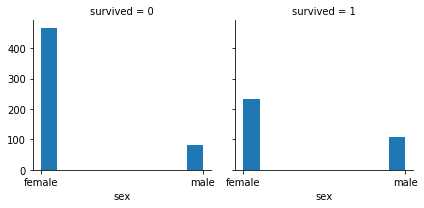

In [96]:
# 瞭解性別在各艙等的分布的存活率
g = sns.FacetGrid(df, col = "survived")
g.map(plt.hist,"pclass");
h = sns.FacetGrid(df, col = "survived")
h.map(plt.hist,"sex");

# PS: 跟第一次做 Face.Grid 有何不同??


可以嘗試其他的參數對照組合

 0   survived        
 1   pclass         
 2   sex            
 3   age          
 5   parch           
 6   fare        
 7   embarked   
 8   class   
 9   who           
 10  adult_male   
 11  deck      
 12  embark_town   
 13  alive         
 14  alone        